<a href="https://colab.research.google.com/github/Vaishnavi943/data-cleaning-dl-ml-ds/blob/main/data-cleaning/jupyter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATA CLEANING**

*   handling missing data
*   outlier detection & handling
*   data scaling & transformation
*   encoding categorical variables
*   handling duplicates
*   dealing with inconsistent data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()
dataset = pd.read_csv("loan.csv")

Saving loan.csv to loan.csv


In [ ]:
dataset.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [ ]:
dataset.shape

(614, 13)

In [ ]:
# number of rows in a dataset
dataset.shape[0]

# How to find missing values in dataset?

In [ ]:
# understand how many NULL values present in the columns
dataset.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
# to find the % how many NULL values present in the columns (for better understanding)
(dataset.isnull().sum()/dataset.shape[0])*100

,0
Loan_ID,0.000000
Gender,2.117264
Married,0.488599
Dependents,2.442997
Education,0.000000
Self_Employed,5.211726
ApplicantIncome,0.000000
CoapplicantIncome,0.000000
LoanAmount,3.583062
Loan_Amount_Term,2.280130


In [ ]:
# total NULL values in overall dataset
dataset.isnull().sum().sum()

np.int64(149)

In [ ]:
# % NULL values present in overall dataset
(dataset.isnull().sum().sum()/(dataset.shape[0]*dataset.shape[1]))*100

np.float64(1.8667000751691305)

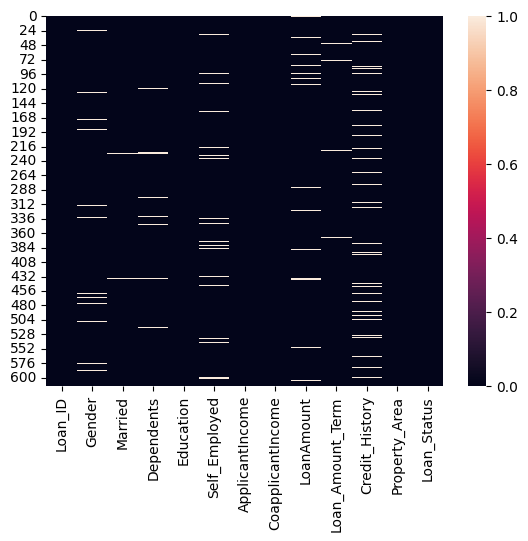

In [ ]:
sns.heatmap(dataset.isnull())
plt.show()

# How to Handle missing values(Dropping)

In [ ]:
# it deletes columns which carry major missing data
dataset.drop(columns=['Credit_History'], inplace=True)

In [ ]:
# it deletes all the rows which carries missing data
dataset.dropna(inplace=True)

# Handle missing values(Imputing Category Data)

In [ ]:
# 1. backward and forward filling (basically applied on CATEGORICAL DATA)
dataset.fillna(method="bfill", axis=1)     # axis=1 (column wise filling)
dataset.fillna(method="ffill")

<ipython-input-22-6b26841af72f>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataset.fillna(method="bfill")


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
# 2. mode  (on particular column)
dataset['Gender'].mode()[0]
dataset['Gender'].fillna(dataset['Gender'].mode()[0], inplace=True)

<ipython-input-26-0a0096bc98b8>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Gender'].fillna(dataset['Gender'].mode()[0], inplace=True)


In [ ]:
# apply MODE on all object-type dataset which carry missing values
for i in dataset.select_dtypes(include="object").columns:
  dataset[i].fillna(dataset[i].mode()[0], inplace=True)

<ipython-input-6-ba718b4bc122>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[i].fillna(dataset[i].mode()[0], inplace=True)


# Handle missing values(Scikit-Learn)

In [ ]:
dataset.select_dtypes(include="float64").columns

Index(['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
       'Credit_History'],
      dtype='object')

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
si = SimpleImputer(strategy="mean")
res = si.fit_transform(dataset[['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
       'Credit_History']])

In [ ]:
new_dataset = pd.DataFrame(res, columns= dataset.select_dtypes(include="float64").columns)

In [ ]:
new_dataset.isnull().sum()

,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


# One Hot Encoding (change of categorical --> numerical) & Dummy Variables

In [ ]:
encoding_data = dataset[['Gender', 'Married']]
encoding_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Gender   614 non-null    object
 1   Married  614 non-null    object
dtypes: object(2)
memory usage: 9.7+ KB


In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe = OneHotEncoder(drop='first')
arr = ohe.fit_transform(encoding_data).toarray()
arr
# sparse matrix ----> data is usually filled in 0 or 1

array([[1., 0.],
       [1., 1.],
       [1., 1.],
       ...,
       [1., 1.],
       [1., 1.],
       [0., 0.]])

In [ ]:
pd.DataFrame(arr, columns=['Gender_Female',  'Married_No'])

,Gender_Female,Married_No
0,1.0,0.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,0.0
...,...,...
609,0.0,0.0
610,1.0,1.0
611,1.0,1.0
612,1.0,1.0


# Label Encoding (performed on Nominal Data)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# example-
# data is unorganised/not in sequence
df = pd.DataFrame({"name": ["wsthric", "cow", "pen", "dog", "black"]})
le = LabelEncoder()
df["en_name"] = le.fit_transform(df[["name"]])
df

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,name,en_name
0,wsthric,4
1,cow,1
2,pen,3
3,dog,2
4,black,0


In [ ]:
dataset['Property_Area'].unique()

array([2, 0, 1])

In [ ]:
la = LabelEncoder()
dataset['Property_Area'] = la.fit_transform(dataset['Property_Area'])
dataset['Property_Area']

,Property_Area
0,2
1,0
2,2
3,2
4,2
...,...
609,0
610,0
611,2
612,2


# Ordinal  Encoding (performed on ordinal data)

In [ ]:
# # data is organised/in sequence
# performed in 2 ways:
# 1. Sklearn
# 2. Map function

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
data_ord = dataset['Property_Area']
data_ord.unique()

array([2, 0, 1])

In [ ]:
en_data_ord = [['Rural', 'Semi-urban', 'Rural']]

In [ ]:
oen = OrdinalEncoder(categories=en_data_ord)
dataset['Property_Area'] = oen.fit_transform(dataset[['Property_Area']])


ValueError: could not convert string to float: 'Graduate'

# Outliers

In [5]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# How to detect Outliers?

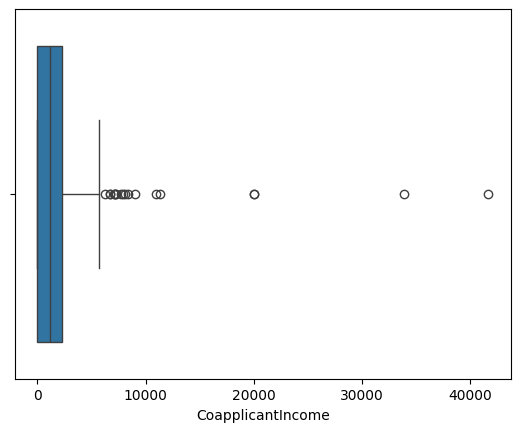

In [6]:
sns.boxplot(x=dataset['CoapplicantIncome'], data=dataset)
plt.show()

# How to handle Outliers using IQR?

In [7]:
# df = pd.DataFrame(dataset, columns=['ApplicantIncome', 'CoapplicantIncome'])
# type(dataset)

In [22]:
q1 = df['ApplicantIncome'].quantile(0.25)
q3 = df['ApplicantIncome'].quantile(0.75)
iqr = q3 - q1
min_range = q1 - (1.5*iqr)
max_range = q3 + (1.5*iqr)
print(q1, q3, iqr, min_range, max_range)

2877.5 5795.0 2917.5 -1498.75 10171.25


In [26]:
new_dataset  = dataset[dataset['ApplicantIncome'] <=max_range]
new_dataset.shape

(564, 13)

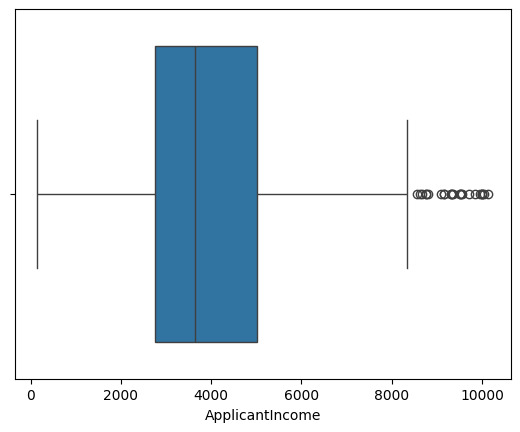

In [28]:
sns.boxplot(x=new_dataset['ApplicantIncome'], data=new_dataset)
plt.show()

# Outlier removal using Z-Score

In [ ]:
# z = (x - mean)/s.d
# z range(data lie in b/w( 99.72% )) = mean - 3S.D to mean + 3S.D

In [31]:
min_rang = (dataset['CoapplicantIncome'].mean()) - (3*dataset['CoapplicantIncome'].std())
max_rang = (dataset['CoapplicantIncome'].mean()) + (3*dataset['CoapplicantIncome'].std())
min_rang, max_rang

(np.float64(-7157.499309645475), np.float64(10399.990905699677))

In [32]:
new_datasett = dataset[dataset['CoapplicantIncome'] <=max_rang]
new_datasett.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [37]:
z_score = (dataset['CoapplicantIncome'] - dataset['CoapplicantIncome']. mean())/dataset['CoapplicantIncome'].std()
dataset['z_score'] = z_score
dataset['z_score'] <= 3
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,z_score
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,-0.554036
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.038700
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.554036
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0.251774
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,-0.554036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,-0.554036
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,-0.554036
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,-0.472019
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,-0.554036


# Feature Scaling (Standardization)

In [46]:
# Standardization ---> it is a very effective technique which re-scales a feature value so that it has distrbution with 0 mean value & variance = 1.
# data ---> shrink and nature/feature ---> same as it
# X(new) = [X(i) - X(mean)]/S.D

In [39]:
from sklearn.preprocessing import StandardScaler

In [43]:
ss = StandardScaler()
ss.fit(dataset[['ApplicantIncome']])
dataset['ApplicantIncome_ss'] = pd.DataFrame(ss.transform(dataset[['ApplicantIncome']]), columns=['x'])
dataset.head()
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,z_score,ApplicantIncome_ss
count,614.000000,614.000000,592.000000,600.00000,564.000000,6.140000e+02,6.140000e+02
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,3.761016e-17,-4.339634e-18
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,1.000000e+00,1.000815e+00
min,150.000000,0.000000,9.000000,12.00000,0.000000,-5.540356e-01,-8.606493e-01
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,-5.540356e-01,-4.138159e-01
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,-1.478842e-01,-2.606393e-01
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,2.310140e-01,6.414426e-02
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.368502e+01,1.238462e+01


<ipython-input-45-fe5b518016ba>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=dataset['ApplicantIncome'] )
<ipython-input-45-fe5b518016ba>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=dataset['ApplicantIncome_ss'] )


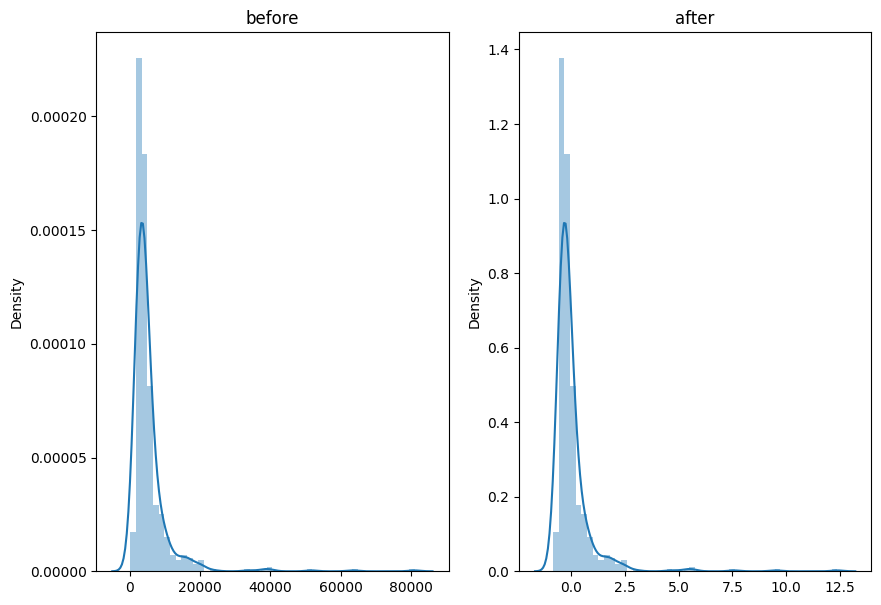

In [45]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.title('before')
sns.distplot(x=dataset['ApplicantIncome'] )

plt.subplot(1,2,2)
plt.title('after')
sns.distplot(x=dataset['ApplicantIncome_ss'] )
plt.show()

# Feature Scaling (Normalization)

In [ ]:
# Normalization ---> it is a scaling technique in which values are shifted and rescaled so that they end up ranging b/w 0 and 1. It is also known as Min-Max scaling.
# data ---> shrink(0 or 1) and nature/feature ---> same as it
# X(new) = [ X(i) - min(X) ] / [ (max(X) - min(X)) ]

In [47]:
from sklearn.preprocessing import MinMaxScaler

In [50]:
ms = MinMaxScaler()
ms.fit(dataset[['CoapplicantIncome']])
dataset['CoapplicantIncome_ms'] = pd.DataFrame(ms.transform(dataset[['CoapplicantIncome']]), columns=['x'])
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,z_score,ApplicantIncome_ss,CoapplicantIncome_ms
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,-0.554036,0.072991,0.000000
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.038700,-0.134412,0.036192
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.554036,-0.393747,0.000000
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0.251774,-0.462062,0.056592
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,-0.554036,0.097728,0.000000


<ipython-input-52-b5b79ee6f196>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=dataset['CoapplicantIncome'] )
<ipython-input-52-b5b79ee6f196>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=dataset['CoapplicantIncome_ms'] )


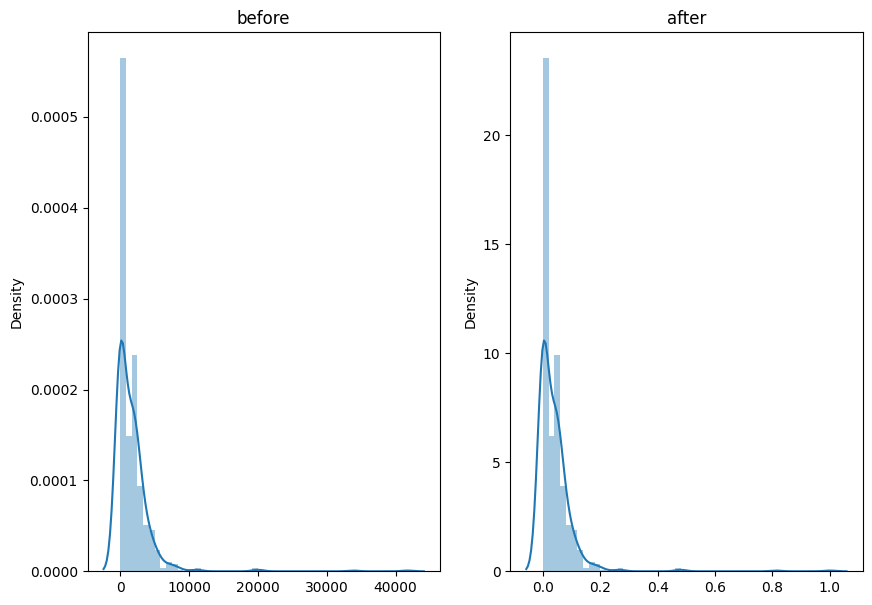

In [52]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.title('before')
sns.distplot(x=dataset['CoapplicantIncome'] )

plt.subplot(1,2,2)
plt.title('after')
sns.distplot(x=dataset['CoapplicantIncome_ms'] )
plt.show()

# How to handle Duplicate Data?

In [3]:
# check if duplicate is present or not-
dataset.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
609,False
610,False
611,False
612,False


In [4]:
dataset.drop_duplicates(inplace=True)

In [5]:
dataset.shape

(614, 13)

# How to change & replace Data Types?

In [6]:
dataset.info()
# Dependents column carry object Dtype instead of float64; means it carry mixed data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
dataset.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,0
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [12]:
dataset['Dependents'].value_counts()

,count
Dependents,
0,360
1,102
2,101
3,51


In [9]:
dataset['Dependents'].fillna(dataset['Dependents'].mode()[0], inplace=True)

<ipython-input-9-cc533137e14f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Dependents'].fillna(dataset['Dependents'].mode()[0], inplace=True)


In [11]:
# replacing of data
dataset['Dependents'].replace("3+", "3", inplace=True)

In [14]:
# conversion of data type
dataset['Dependents'] = dataset['Dependents'].astype("int64")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ KB


# Function Transformer

<ipython-input-19-577b0df13981>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = dataset['CoapplicantIncome'])


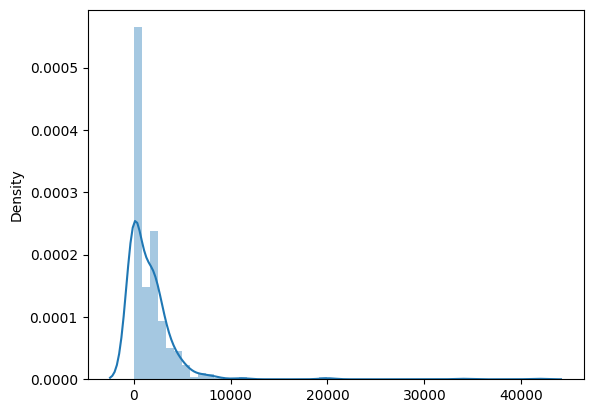

In [19]:
# changing the data pattern
# you may or may not remove outliers before applying Function Transformer.
# result - it may or may not remove outliers(depends on which function you are using like log, x^2, etc)
# eg :- non-normal form to normal form (many ML algorithm works on normal form and prediction occurs correctly)
sns.distplot(x = dataset['CoapplicantIncome'])    # it doesn't contain NULL values
plt.show()

<ipython-input-26-9e97d84c5f4d>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = dataset['CoapplicantIncome'])    # it doesn't contain NULL values


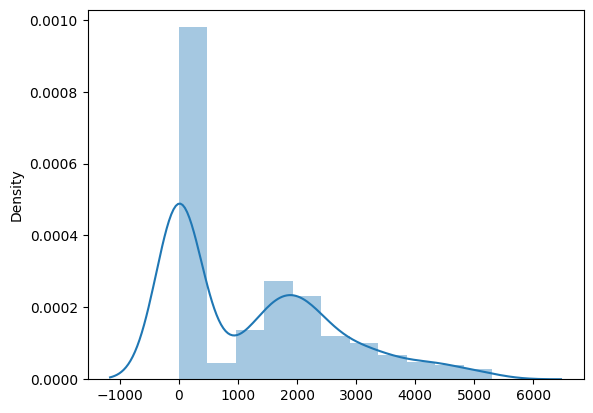

In [26]:
# removal of outlier-
q1 = dataset['CoapplicantIncome'].quantile(0.25)
q3 = dataset['CoapplicantIncome'].quantile(0.75)
iqr = q3 - q1
min_rangee = q1 - (1.5*iqr)
max_rangee = q3 + (1.5*iqr)

dataset = dataset[dataset['CoapplicantIncome'] <= max_rangee]

sns.distplot(x = dataset['CoapplicantIncome'])
plt.show()

In [27]:
from sklearn.preprocessing import FunctionTransformer

In [29]:
ft = FunctionTransformer(func=np.log1p)
ft.fit(dataset[['CoapplicantIncome']])
dataset['CoapplicantIncome_ft'] = ft.transform(dataset[['CoapplicantIncome']])

<ipython-input-31-0c20f7eeac04>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=dataset['CoapplicantIncome'] )
<ipython-input-31-0c20f7eeac04>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=dataset['CoapplicantIncome_ft'] )


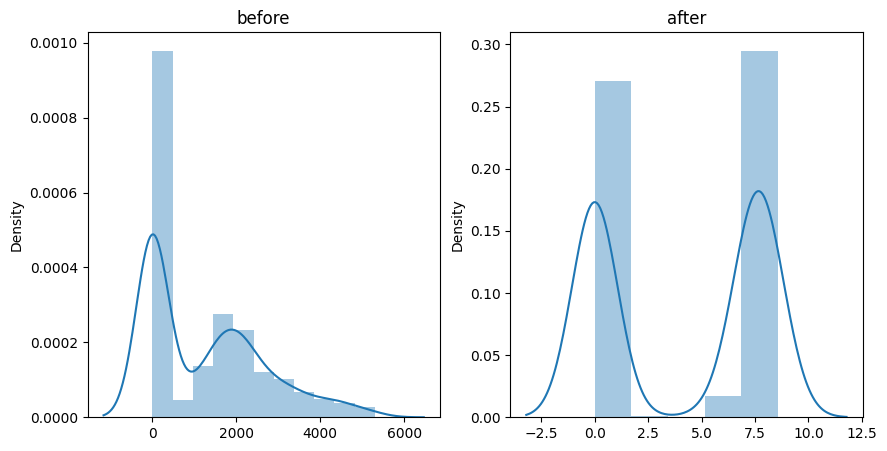

In [31]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('before')
sns.distplot(x=dataset['CoapplicantIncome'] )

plt.subplot(1,2,2)
plt.title('after')
sns.distplot(x=dataset['CoapplicantIncome_ft'] )
plt.show()